# Import Dependencies

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

In [166]:
df=pd.read_csv('titanic.csv')

# Understanding the Data

In [167]:
df.columns


Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')

In [168]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


# Data Cleaning

In [170]:
df.duplicated().any()

np.False_

In [171]:
age_mean=df['age'].mean()
fare_mean=df['fare'].mean()
emb_mode=df['embarked'].mode()[0]
df['age']=df['age'].fillna(age_mean)   
df['fare']=df['fare'].fillna(fare_mean)  
df['embarked']=df['embarked'].fillna(emb_mode)  
df=df.drop(columns=['cabin'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   embarked  1309 non-null   object 
 9   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


# Data Transformation/Feature Engineering

In [172]:
df['age']=df['age'].round(1)   
df['fare']=df['fare'].round(1)

In [173]:
df['family_cnt']=df['sibsp']+df['parch']
df=df.drop(columns=['sibsp','parch'])

In [174]:
df['embarked'].unique()
df['embarked']=df['embarked'].replace({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})

In [175]:
df=df.rename(columns={'sex':'gender',})

In [176]:
df['gender']=df['gender'].str.title()

In [177]:
df[['Last_name', 'rest']] = df['name'].str.split(',', n=1, expand=True)
df['Last_name'] = df['Last_name'].str.strip()
df['rest'] = df['rest'].str.strip()
df[['Title', 'First_Name']] = df['rest'].str.split(' ', n=1, expand=True)
df['Title'] = df['Title'].str.replace(r'\.$', '', regex=True)
df = df.drop(columns='rest')

In [178]:
g=df['ticket'].value_counts()
solo_ticket=g[g==1].index
def f1(d):
    if d['family_cnt']>0 :
        return 'Family'
    else:
        if d['ticket'] in (solo_ticket):
            return 'solo'
        else:
         return "Friends"

In [179]:
df['Companion_type']=df.apply(f1,axis=1)

In [180]:
lst=['ticket','Title','First_Name','Last_name', 'gender','age','Companion_type','family_cnt','pclass','embarked', 'fare','survived']
df=df[lst]

In [181]:
df['age_cat']=pd.cut(df['age'],bins=[0,15,25,60,81],labels=['child','teen','adult','senior'])

# Data Analysis

What is the survival and non-survival count

In [182]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

What was the survival count gender wise?

In [183]:
df.groupby('gender')['survived'].value_counts()

gender  survived
Female  1           339
        0           127
Male    0           682
        1           161
Name: count, dtype: int64

What was the survival count passenger class wise?

In [184]:
df.groupby('pclass')['survived'].value_counts()

pclass  survived
1       1           200
        0           123
2       0           158
        1           119
3       0           528
        1           181
Name: count, dtype: int64

What was the relationship between fare paid and survival?

In [185]:
df.groupby('survived')['fare'].mean()

survived
0    23.368109
1    49.363800
Name: fare, dtype: float64

Relation b/w age category and survival

In [186]:
df.groupby('age_cat')['survived'].value_counts()

D:\\ipykernel_17464\2710475093.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_cat')['survived'].value_counts()


age_cat  survived
child    1            66
         0            49
teen     0           206
         1           122
adult    0           529
         1           304
senior   0            25
         1             8
Name: count, dtype: int64

Companion type and survival

In [187]:
df.groupby('Companion_type')['survived'].value_counts()

Companion_type  survived
Family          1           261
                0           258
Friends         0            67
                1            60
solo            0           484
                1           179
Name: count, dtype: int64

1. How many passengers survived vs. did not survive overall?

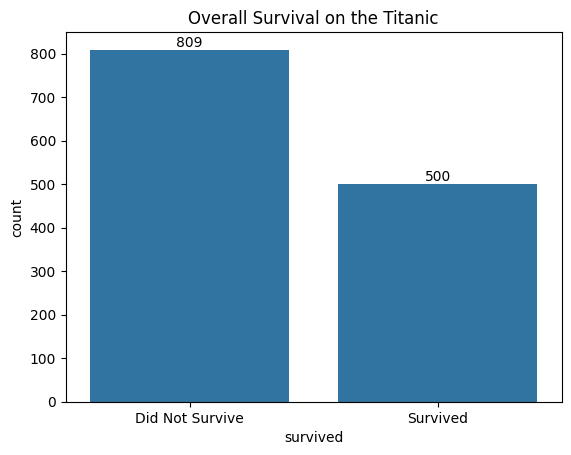

In [188]:
a=sns.countplot(df,x="survived")
a.bar_label(a.containers[0])
plt.title("Overall Survival on the Titanic")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.show()

OBSERVATION:

In the total count of people who travelled on an avg 60% of people lost there life

2. Did gender play a role in survival?

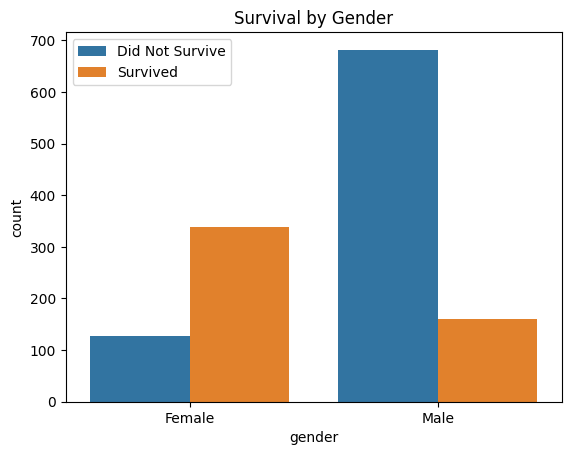

In [189]:
sns.countplot(x="gender", hue="survived", data=df)
plt.title("Survival by Gender")
plt.legend(labels=["Did Not Survive", "Survived"])
plt.show()


OBSERVATION:

Male lost their lives in higher count


3. Did passenger class affect survival chances?

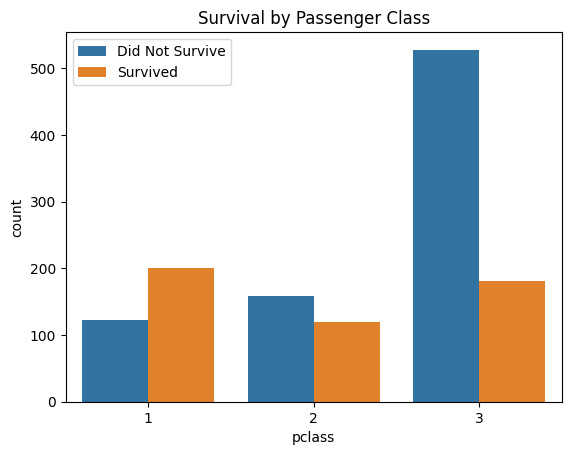

In [190]:
sns.countplot(x="pclass", hue="survived", data=df)
plt.title("Survival by Passenger Class")
plt.legend(labels=["Did Not Survive", "Survived"])
plt.show()


OBSERVATION:

Pclass 3 can be considered as unsafe as most lives are lost there, wherein pclass 1 has more survival rate 

Did fare differences within each Pclass affect survival?

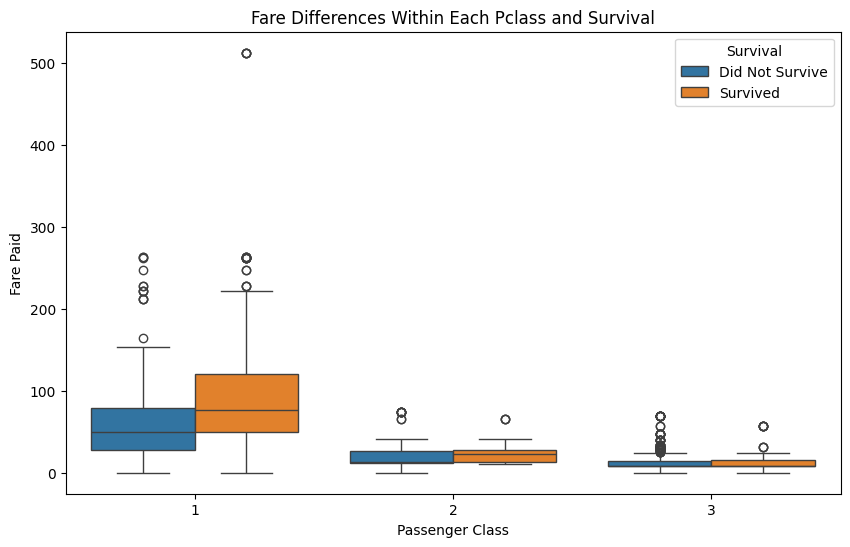

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(df,x="pclass", y="fare", hue="survived")
plt.title("Fare Differences Within Each Pclass and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Fare Paid")
# plt.legend(labels=['not survived','survived'])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["Did Not Survive", "Survived"], title="Survival")
plt.show()

OBSERVATION:

From the prev plot we found that pclass one is safe than 3..for that this mayb the reason.

Here we can see that people in pclass 1 have paid more 


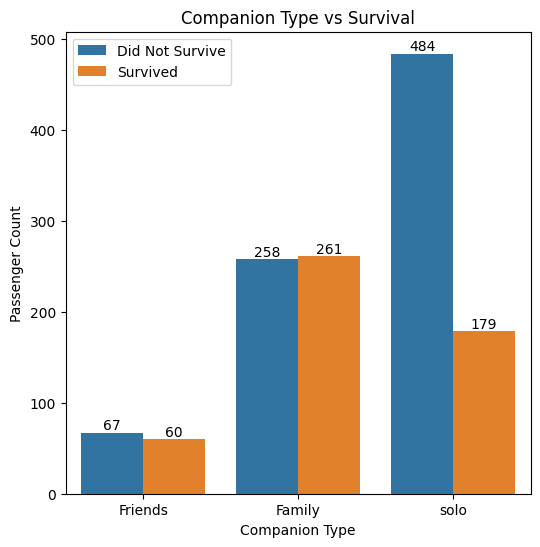

In [ ]:
plt.figure(figsize=(6,6))
a=sns.countplot(df,x="Companion_type", hue="survived")
for i in a.containers:
    a.bar_label(i)
plt.title("Companion Type vs Survival")
plt.xlabel("Companion Type")
plt.ylabel("Passenger Count")
plt.legend(labels=["Did Not Survive", "Survived"])
plt.show()

OBSERVATION:

Solo travelling: Low survival rate --Nobody to save them

Friends or Family: Their Survival rate is better than solo travellers 



Survival count based on Companion type and pclass

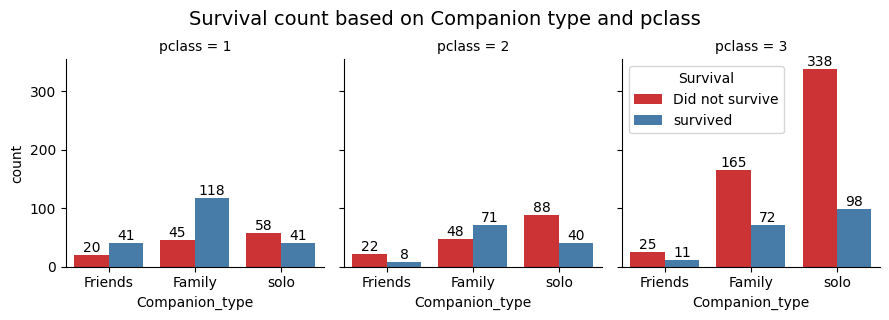

In [202]:
fg=sns.FacetGrid(df,col='pclass')
fg.map_dataframe(sns.countplot,x='Companion_type',hue='survived',hue_order=[0,1],palette='Set1')
for ax in fg.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

fg.fig.suptitle('Survival count based on Companion type and pclass', fontsize=14, y=1.05)
plt.legend(title='Survival',labels=['Did not survive','survived'],loc='upper left')
plt.show()

OBSERVATION:

Among 484 solo travellers who lost their life  338 died in pclass 3 


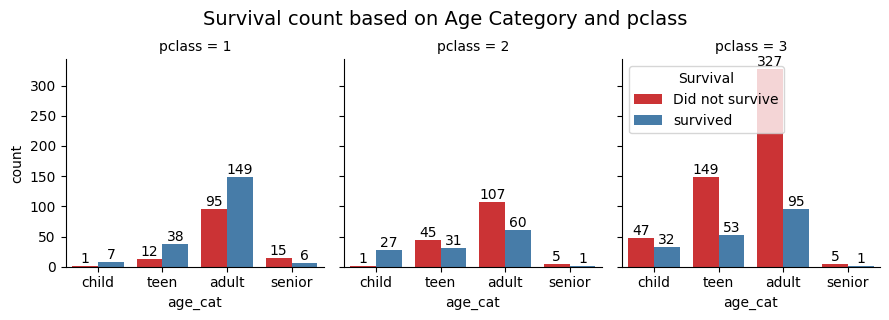

In [207]:
fg=sns.FacetGrid(df,col='pclass')
fg.map_dataframe(sns.countplot,x='age_cat',hue='survived',hue_order=[0,1],palette='Set1')
for ax in fg.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

fg.fig.suptitle('Survival count based on Age Category and pclass', fontsize=14, y=1.05)
plt.legend(title='Survival',labels=['Did not survive','survived'],loc='upper left')
plt.show()

OBSERVATION:

Death rate in pclass 3 is more in that age_cat wise adults have lost their life in high count


passenger count based on their destination

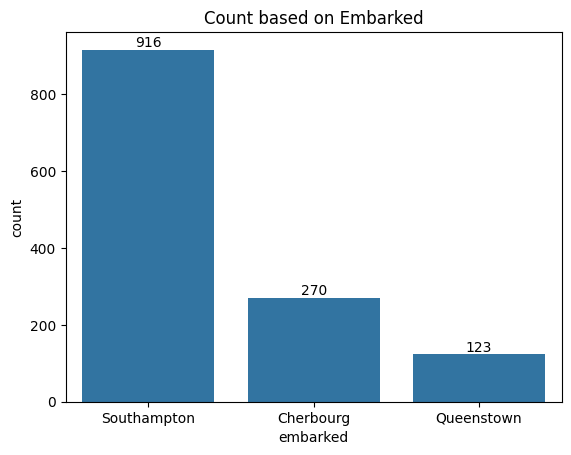

In [211]:
a=sns.countplot(x="embarked",data=df)
plt.title("Count based on Embarked")
for i in a.containers:
    a.bar_label(i)
plt.show()

OBSERVATION:

People travelling to Southampton is more

survival rate based on their destination

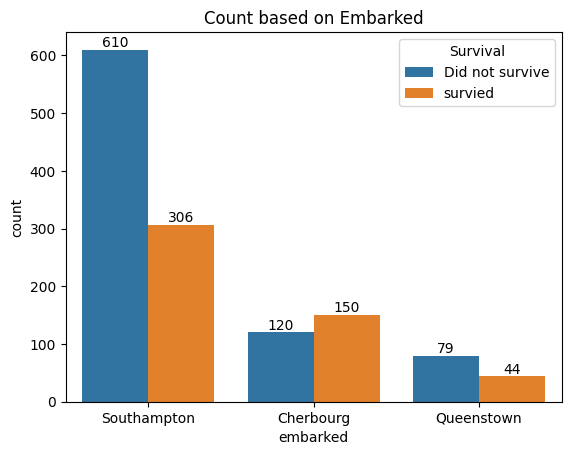

In [213]:
a=sns.countplot(df,x="embarked",hue="survived")
plt.title("Count based on Embarked")
for i in a.containers:
    a.bar_label(i)
plt.legend(title='Survival',labels=['Did not survive','survied'])
plt.show()

OBSERVATION:

Among 916 passengers to Southampton 610 people has lost there life

# CONCLUSION

Adult males had the highest death count. This reflects that many adult men likely prioritized saving others—especially women and children—by risking their own lives.

Passengers in 3rd class experienced the highest fatalities. A key factor behind this is the lower fare, which restricted access to safer parts of the ship and reduced survival opportunities.

Companion type influenced survival chances. Passengers traveling with family or in groups had better survival rates compared to those traveling alone.

Port of embarkation (destination) had little impact on survival. For example, Southampton had the highest number of passengers, which naturally led to a higher death count, but the embarkation point itself was not a determining factor in survival.

Overall, survival was shaped strongly by social dynamics (gender and companion type) and economic status (class and fare), rather than by embarkation port.